<a href="https://colab.research.google.com/github/visiont3lab/covid-mask-classifier/blob/master/utils/colab/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering 

> **Importante**: Il contenuto di questo notebook proviene dal noteook [Kmeans Python Data science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb) . 

Ulteriori references si possono trovare ai seguenti links:

* [Python Data Science HandBook Github](https://github.com/jakevdp/PythonDataScienceHandbook)
* [Python Data Science HandBook Colab](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb)
* [Kmeans Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
* [Example implementation Kmeans numpy](https://flothesof.github.io/k-means-numpy.html)
* [DBSCAN slide spiegazione](http://staff.icar.cnr.it/manco/Teaching/2005/datamining/lezioni/lezione11.pdf)
* [Sklearn Clustering Come scegliere l'algoritmo di clustering giusto?](https://scikit-learn.org/stable/modules/clustering.html)
* [Kmeans from scratch tutorial](https://mmuratarat.github.io/2019-07-23/kmeans_from_scratch)
* [Silohuette score explaination](https://www.youtube.com/watch?v=5TPldC_dC0s)

## 1. Overview Clustering

Apprendimento non supervisionato. L'obbiettivo è strutturare i dati in base a qualcosa che essi hanno in comune senza avere una conoscenza a priopri di essi.

Se volessimo creare un classificatore binario capace di capire quando in un immagine c'è o  non c'è manuel dovremmo avere un dataset con immmagini di manuel e immagini di altre persone. Tuttavia avere immagini di tutte le persone del mondo è complicato e pertanto risulta più facile usare un algoritmo unsupervised (non supervisionato) cioè che non ha bisogno di labels (etichette). Pertanto  dato un dataset dove vi sono 100 immagini di manuel e 100 immagini di altre persone vogliamo costruire un algoritmo capace di raggruppare le immagini in manuel e non manuel senza avere le label associate alle immagini.

Obbiettivo è usare unlabeled data (dati non etichettati).

### Clustering Applications

#### **Che cosa si intende con il termine clustering?**
* Clustering: raggruppare elementi "simili" dentro dei cluster (insiemi). 
> <cite> It is the task of identifying similar instances and assigning them to clusters, i.e., groups of similar instances. </cite>

#### **In che tipo di applicazione è utilite utilizzarlo?**

* **Anomaly detection**: l'obbiettivo è imparare il significato di normale. Vogliamo essere in grado di distingure qualcosa che è normale da qualcosa che è anomalo. In particolare in questo campo sono molto utili algoritmi di clustering basati sulla densità (density estimation). Dove vi è una alta densità di dati avremo qualcosa che è "normale" mentre a areee di bassa densità corrisponderanno delle anomalie. 

* **Image segmentation**: l'obbiettivo è quello di semgmentare l'immagine in diverse parti basandoci sul colore. Il numero di colori (o numero di cluster) lo definiamo noi a priori. Per questo tipo di applicazionee algoritmi basati su centroid come Kmeans sono adatti in quanto partendo da un punto aggregano i punti ad esso vicino in base a una condizione.

* **Preprocessing**: Clustering può essere usato per capire quali elementi del dataset sono più importanti di altri. Per esempio se consideriamo il MNIST dataset esso e formato da 70000 immagini ed è diviso in 10 classi (0-9). Se volessimo ridurre il dataset mantenendo pù o meno lo stesso contenuto di informazioni potremmo usare la PCA ma anche il clustering. Infatti un algoritmo di clustering come il Kmeans con numero di cluster uguale a 50 ci ragruppa le immagini in 50 classi. Qundi adesso pescando 1 immagine a casa da queste 50 classi possiamo allenare il nostro classifier con 50 invece che 70000 immagini. In questo caso è imporntante essere sicuri che il numero di cluster scelta è ababstanza grande da avere una rappresentazione significativa del dataset.

#### **Come selezionare i clusters?**

**Elbow Method**: Si basa sul calcolo dell'inerzia per stimare il numero ottimale di clusters. Tuttavia l'**inerzia** (inertia) NON è un ottimo modo per selezionare il numero ottimale di clusters (k). Questo perchè tale valore tende ad essere molto piccolo all'aumentare dei clusters (k). Infatti, aumentando il numero di clusters ogni elemento sarà più vicino al k centroide e pertanto l'inerzia diminuirà. 

**Silhoutte Score**: Il coefficiente silhouette puñ variare da -1 a 1. Un coefficiente vicino a 1 signitate che l'elemento è dentro il propro cluster e lontano dagli altri. Un coefficient vicino a 0 ci dice che l'elemento è vicino a dei "cluster boundaries". Coeffieciente uguale a -1 significa che l'elemento è stato assegnato al cluster sbagliato.

**Kmeans limitations**:

it is fast, scalable but we need to run it multiple times to avoid sub optimal solution and we need to set the cluster number. Kmeans does not behave well when cluster varying size., different densities or non spherical shapes.
So depending on the data,
different clustering algorithms may perform better. For example, on
these types of elliptical clusters, Gaussian mixture models work great.



## 2. Kmeans Algoritmo

Importante:
> È imporntante scalare gli input prima di applicare l'algoritmo Kmeans, altriment i clusters protrebbero risultare molto strecciati.  (Rule of thumb it is to scale (Standard Scaling).


![(run code in Appendix to generate image)](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.11-expectation-maximization.png?raw=1)


Kmeans discussione:
* **hard clustering**: L'istanza o elemento SI o NO appartiene al cluster?
* **soft clustering**: L'istanza o elemento ha un punteggio di appartenza ad ogni clusters. Tale punteggio può essere calcolato come la stinza che il punto l'elemento ha dal centro dei clusters.
* **kmeans performance metric inertia** .  Questa metrica è the mean squared distance  tra ogni elemento (punto) e il centroide piç vicino. L'algoritmo Kmeans viene eseguito N volte e viene preso come modello migliore quello con inerzia minore.
* **sklearn Kmeans usa K-means++ smarter initialization**. Questo forza la selezione di centroidi iniziali in modo  che essi siano distanti tra di loro. Nel Kmeans originale i centroidi iniziali erano scelti in modo casuale.

Limitazioni:
 * L'algoritmo K-Means non si comporta bene quando i dati sono raggruppati in gruppi di diametro diverso in quanto assegna un punto a un cluster basandosi soltanto sulla distanza che esso ha dal centroide. Non si comporta bene neanche quando  i dati hanno densità diverse o forme non sferiche.
 * È un algoritmo veloce e facilmente scalabile anche se è necessario farlo andare più volte al fine di eveitare soluzioni che sembrano ma non sono ottimali.È importante sottolineare che il l'inizializzazione (posizione iniziale dei centroid) del Kmeans avviene random e pertanto esso potrebbe condurre a soluzioni buone ma non ottimali. 

Conclusione:
> la forma dei dati, cioè come essi si distribuiscono nello spazio è fondamentale per determinare il tipo di clustering da usare.

### Implementazione

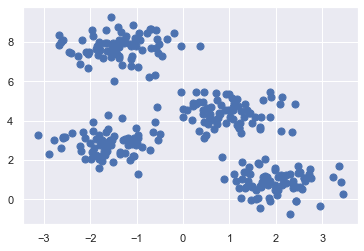

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin, pairwise_distances

# Geta data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

#### Implentazione da zero

[[ 0.27239604  5.46996004]
 [-1.36999388  7.76953035]
 [ 0.08151552  4.56742235]
 [-0.6149071   3.94963585]]


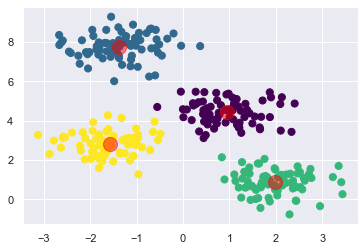

In [ ]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    print(centers)
    
    while True:
        # 2a. Assign labels based on closest center
        # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)


[[1.07627418 4.68480619]
 [2.47019077 1.31451315]
 [1.24258802 4.50399192]
 [2.5270643  0.6178122 ]]


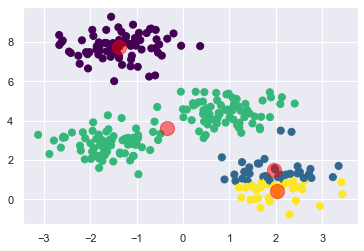

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Importante:
> È importante sottolineare che il risultato ottimale non è garantito. Infatti  vi sono diverse soluzioni che sono sub ottimali ma non ottimali come quella mostrata nella figura in alto. Pertanto è necessario ripetere la procedura di  E-M (Expectation Maximization)  diverse volte con diverse inizializzazioni dei centroidi. Scikit-Learn di default ha un parametro chiamato "n_init=10" che ha la funzionalità di definire quanto volte voglio ripetere l'algoritmo.

#### Implementazione sklearn

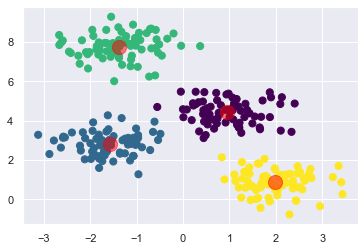

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Problema:
> Il numero di cluster deve essere scelto a priori. È necessario a priori avere una conoscenza di in quante parti si vuole dividere il dataset. L'algoritmo di Kmeans non è in grado di calcolarsi il numero di clusters usando il dataset stesso.

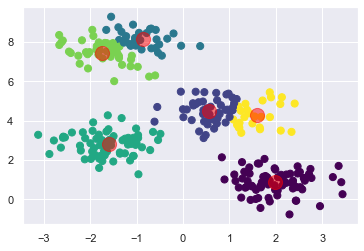

In [ ]:
kmeans = KMeans(6, random_state=0)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### KMeans plot usando Plotly

In [ ]:
import plotly.graph_objects as go

# Apply Kmeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
labels = kmeans.predict(X) #hard clustering
centers = kmeans.cluster_centers_

# Plot using Plotly Library
xx = X[:, 0]
yy = X[:, 1]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x = xx,
    y = yy, 
    mode="markers",
    text = labels, 
    hovertemplate = 'X: %{x:.2f} <br>' +
    'Y: %{y}  <br>' +
    'Labels: %{text:.2f} <br>',
    name = "punti",
    marker=dict(
        size=15,
        color=labels.astype(np.float), #"red", #df_train["T"],             # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=0.8
        )
    )
)
fig.add_trace(go.Scatter(x=centers[:, 0],y=centers[:, 1], mode="markers", name="centri",
        marker=dict(
            size=20,
            color="black" #labels.astype(np.float), #"red", 
        )))
fig.update_layout(hovermode="x")
fig.show()

#centers = kmeans.cluster_centers_
#plt.scatter(X[:, 0], X[:, 1], c=labels,cmap='viridis') #, s=50, cmap='viridis');
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=1)

### Come scegliamo il numero giusto di clusters?

### Elbow method
* **Distortion**: È la media delle distanze al quadrato tra i centri dei clusters. Come metrica si utilizza la distance euclidea.
* **Inertia**: Per ogni campione mi calcolo la distanza euclidea (mean square distance) che esso ha da un cluster center. Ripeto l'operazione per ogni cluster e sommo i risultati.

#### Distorsione implementazione

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.paired_euclidean_distances.html
from sklearn.metrics.pairwise import pairwise_distances
n_clusters = centers.shape[0]
distortion =0
for i in range(0,n_clusters):
    cluster_data = np.array(X[labels==i])
    center = centers[i,:].reshape(1,-1)
    dist = sum(pairwise_distances(cluster_data,center,metric='euclidean').reshape(-1,1))/cluster_data.shape[0]
    distortion = distortion + dist
distortion = distortion /n_clusters
print("Distorsione: ", "Cluster: ", n_clusters, "=", distortion)

Distorsione:  Cluster:  10 = [0.52226331]


#### Inertia implementazione

In [ ]:
#from sklearn.metrics.pairwise import euclidean_distances
n_clusters = centers.shape[0]
inertia =0
for i in range(0,n_clusters):
    cluster_data = np.array(X[labels==i])
    center = centers[i,:].reshape(1,-1)
    dist = np.linalg.norm(cluster_data - center) # Euclidean distance
    dist = dist**2
    #dist = pairwise_distances(cluster_data,center,metric='euclidean')
    inertia = inertia + dist
inertia = inertia
print("Inertia: ", "Cluster: ", n_clusters, "=", inertia)

Inertia:  Cluster:  10 = 112.41639656079565


In [ ]:
kmeans.inertia_

112.41639656079562

In [ ]:
# Score è lo stesso dell'inertia
kmeans.score(X,centers)

-112.41639656079565

In [ ]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
k = 4 # number of clusters
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
    
    distortions.append(sum(np.min(pairwise_distances(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(pairwise_distances(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

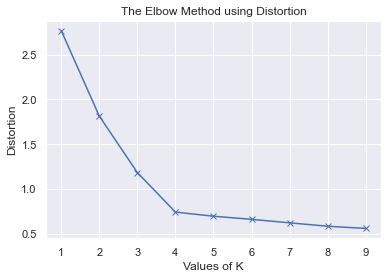

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

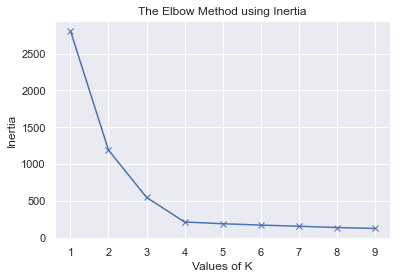

In [ ]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

## Esercizio

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from google.colab.patches import cv2_imshow # cv2.imshow("ds",image)
import cv2
import numpy as np
import matplotlib.pyplot as plt

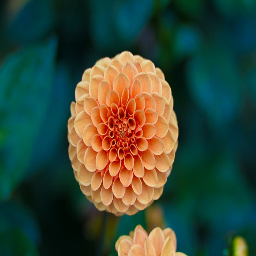

In [ ]:
im = load_sample_image('flower.jpg') # china.jpg
#im = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
im = cv2.resize(im, (256,256)) #w, h

#im = im[:,:,0]
#cv2_imshow(im[:,:,2]) # BGR
cv2_imshow(im) # -- Blu  BGR

In [ ]:
w, h, d = tuple(im.shape)
print(w,h,d)

256 256 3


In [ ]:
# Assicurasi che i numeri con la virgola vengono presi
im = np.array(im, dtype=np.float64) / 255

In [ ]:
# Flatten 
im_flat = np.reshape(im, (w * h, d))
# Shuffle
#im_sample = shuffle(im_flat, random_state=42)
print(im_flat.shape)

(65536, 3)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler(feature_range=(0,1))
im_flat = m.fit_transform(im_flat)

In [ ]:
import pandas as pd
pd_dict = {
    "red" : im_flat[:,0],
    "green" : im_flat[:,1],
    "blue" : im_flat[:,2],
}
df = pd.DataFrame(pd_dict)
df.head()

,red,green,blue
0,0.678431,0.784314,0.901961
1,0.682353,0.788235,0.905882
2,0.682353,0.788235,0.905882
3,0.678431,0.792157,0.909804
4,0.674510,0.788235,0.905882


In [ ]:
from sklearn.cluster import SpectralClustering

# Kmean
#kmeans = KMeans(n_clusters=2,max_iter=300,tol=0.0001)ù
kmeans = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
kmeans.fit(im_flat)
labels = kmeans.predict(im_flat) #hard clustering
centers = kmeans.cluster_centers_
print(centers)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


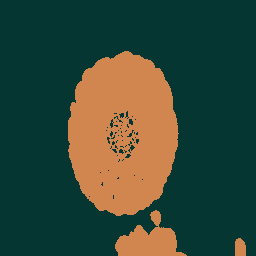

In [ ]:
im_new = np.zeros(im_flat.shape, dtype=np.uint8)
for i in range(0, im_flat.shape[0]):
    lb = labels[i]
    c = centers[lb] # 0,1
    c = np.array(c*255,dtype=np.uint8)
    im_new[i,:] = c
im_new = im_new.reshape((w,h,d))
cv2_imshow(im_new)

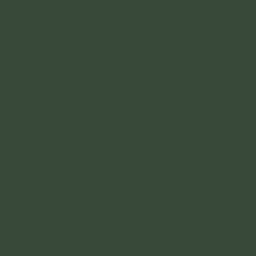

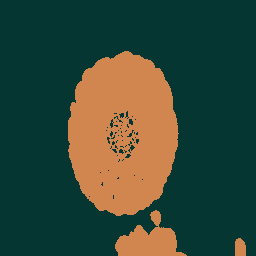

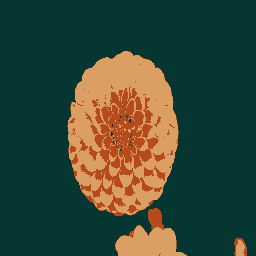

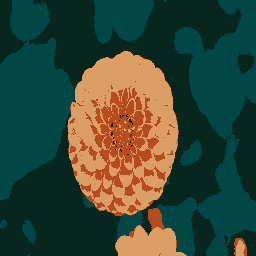

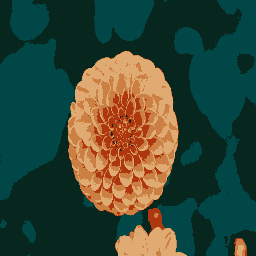

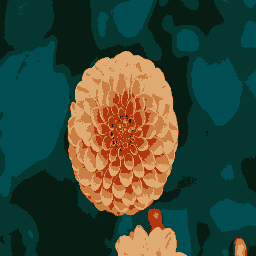

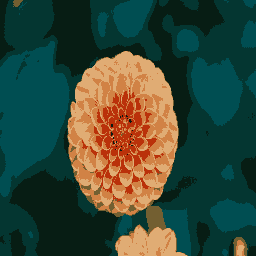

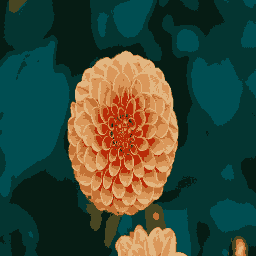

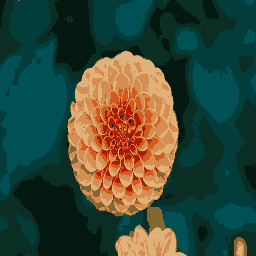

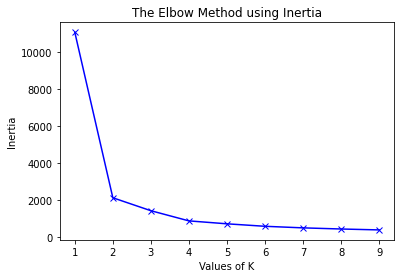

In [ ]:
inertias = [] 
K = range(1,10) 
for k in K: 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(im_flat)       
    labels = kmeans.predict(im_flat) #hard clustering
    centers = kmeans.cluster_centers_
    
    im_new = np.zeros(im_flat.shape, dtype=np.uint8)
    for i in range(0, im_flat.shape[0]):
        lb = labels[i]
        c = centers[lb] # 0,1
        c = np.array(c*255,dtype=np.int)
        im_new[i,:] = c
    im_new = im_new.reshape((w,h,d))
    #im_new = cv2.cvtColor(im_new, cv2.COLOR_BGR2RGB)
    cv2_imshow(im_new)
    cv2.imwrite("im_"+str(k)+".png",im_new)
    
    inertias.append(kmeans.inertia_) 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()


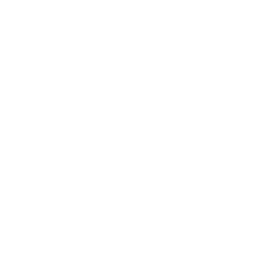

In [ ]:
def reconstruct_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_index = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1
    return image

im_res = reconstruct_image(kmeans.cluster_centers_, labels, w, h)
cv2_imshow(im_res*255)

### Silhouette analysis
Dati due cluster 1 e 2 definiamo **a** come la distanza media tra tutti i punti appartenenti alla classe 1 e il suo centroide mentre **b** è la distanza tra la distanza media tra il centroide di **a** e i punti **b** del cluster

$Formula = \frac{(b-a)}{max(a,b)}$


> Il Silhouette_score fornisce il valore medio per tutti i campioni.
Ciò offre una prospettiva della densità e della separazione dei cluster formati

The silhouette coefficient può variare tra -1 e +1: un coefficiente vicino a +1 significa che il campione
è contenuto all'interno del proprio cluster e lontano dagli altri cluster, mentre
un coefficiente vicino a 0 significa che il campione è vicino al bordo del cluster e
infine un coefficiente vicino a -1 significa che il campione potrebbe essere stato
assegnato al cluster sbagliato

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.4387644975296138


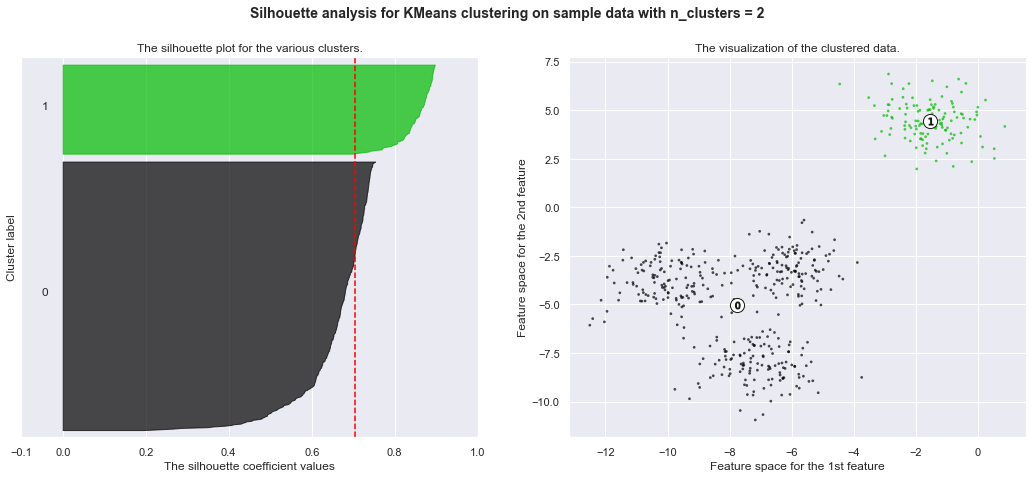

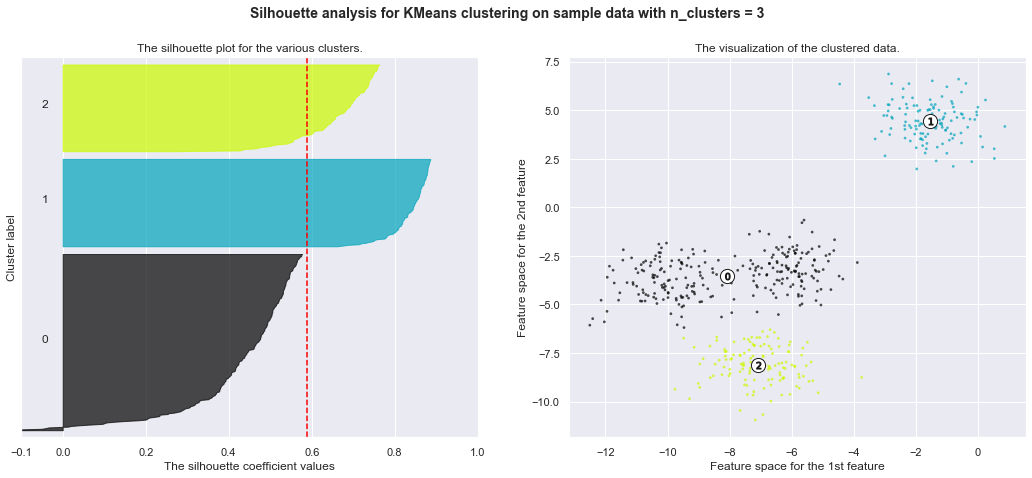

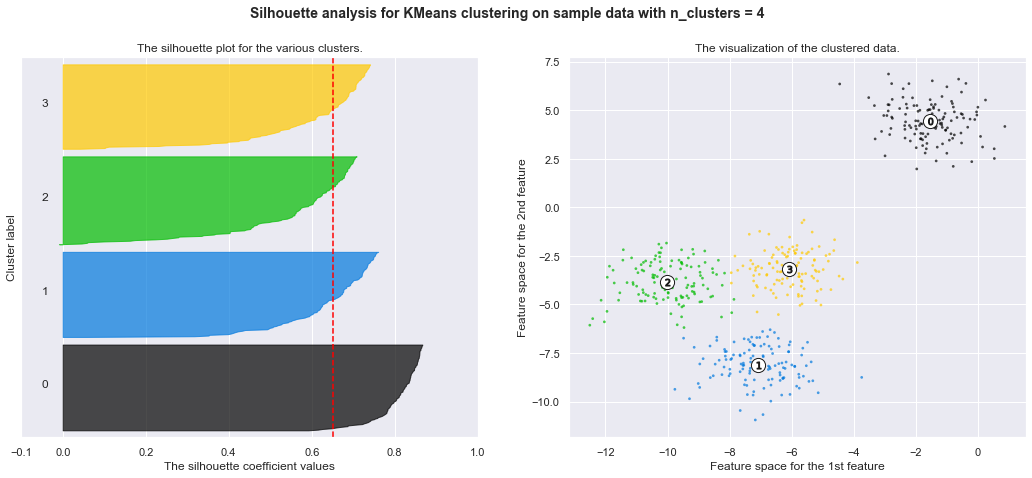

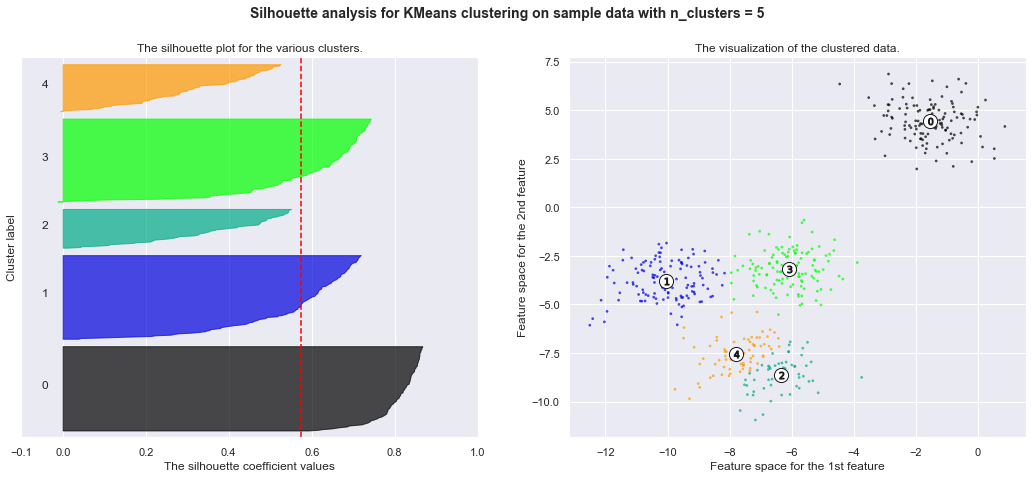

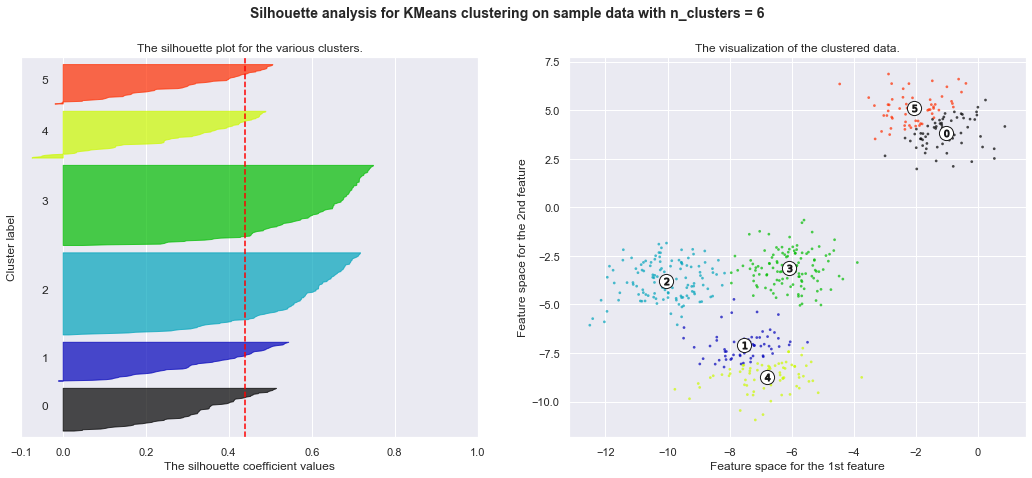

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Spectral clustering vs Kmeans

Importante: Problema Kmeans: Esso è limitato a boundaries lineari
> L'algoritmo kmeans si basa sulla vicinanza che i punti hanno rispetto al centroide trovato o scelto. Pertanto esso non generalizza bene quando i cluster hanno geometrie particolari. Inoltre i cluster sarranno divisi da boundaries lineari.


Nota: 
> <cite> SpectralClustering uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm. This will alllow to achieve higher dimensionality and generalize better. </cite>

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

/home/manuel/visiont3lab-github/public/tecnologie_data_science/env/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



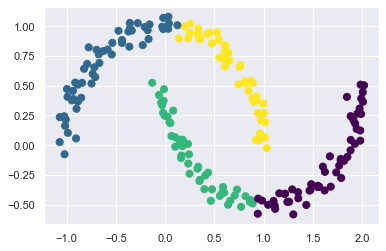

In [ ]:
# Spectral clustering
model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

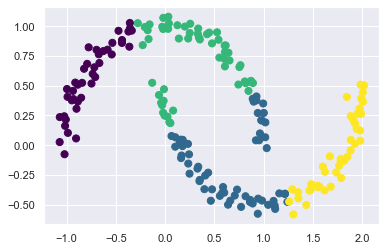

In [ ]:
# Kmeans clustering
labels = KMeans(4, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

## 3. Clustering for Image Segmentation
Divide image into multiple segment (color segmentation). We will collect pixel having the same color. 

Importnat: K-Means prefers clusters of similar size

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image
uploaded = files.upload()

In [ ]:
name = list(uploaded.keys())
print(name)
im = np.array(Image.open(BytesIO(uploaded[name[0]])))

['selfie.jpg']


(1067, 1600, 3)
(1707200, 3)


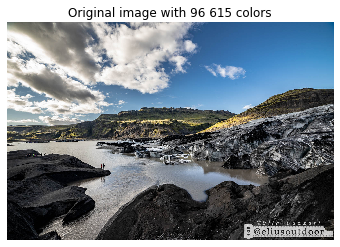

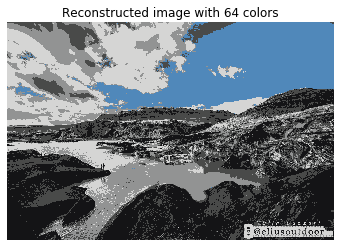

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

def reconstruct_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_index = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1
    return image

#im = load_sample_image('flower.jpg') # china.jpg
flower = np.array(im, dtype=np.float64) / 255
plt.imshow(im)
#plt.show()

print(im.shape) # (427,640,3)
w, h, d = original_shape = tuple(im.shape)
#print(w,h,d) # 427, 640, 3
#assert d == 3
image_array = np.reshape(flower, (w * h, d))
print(image_array.shape) # (273280,3)

# Setting  Kmeans
image_sample = shuffle(image_array, random_state=42)[:1000]
n_colors = 5
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(image_sample)
#Get color indices for full image
labels = kmeans.predict(image_array)

# Plots
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image with 96 615 colors')
plt.imshow(im)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Reconstructed image with 64 colors')
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h))
plt.show()


## 4. DBSCAN Algoritmo
local density estimation. It allows to identify clusters of arbitraty shapes. This algorithm defines clusters as continuous regions of high density.
This algorithm works well if all the clusters are dense enough, and they
are well separated by low-density regions.

* For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε-neighborhood. 

* If an instance has at least min_samples instances in its ε-neighborhood (including itself), then it is considered a coreinstance. In other words, core instances are those that are located in dense region.

* All instances in the neighborhood of a core instance belong to the same cluster. This may include other core instances,
therefore a long sequence of neighboring core instances forms
a single cluster.

* Any instance that is not a core instance and does not have one
in its neighborhood is considered an anomaly.

In short, DBSCAN is a very simple yet powerful algorithm, capable ofidentifying any number of clusters, of any shape, it is robust to outliers,and it has just two hyperparameters (eps and min_samples).However, if the density varies significantly across the clusters, it can beimpossible for it to capture all the clusters properly. Moreover, itscomputational complexity is roughly O(m log m), making it prettyclose to linear with regards to the number of instances. 


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X)


DBSCAN(eps=0.1)

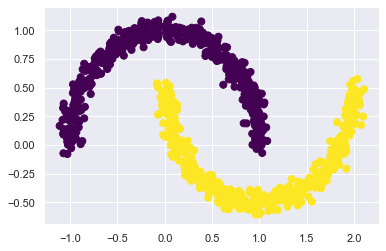

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_,
            s=50, cmap='viridis');

## 5. Other clustering algorithms

* Agglomerative clustering: . It can scale nicely to large numbers of
instances if you provide a connectivity matrix. This is a sparse
m by m matrix that indicates which pairs of instances are
neighbors (e.g., returned by
sklearn.neighbors.kneighbors_graph()).

* Mean shift: can find cluster of any shape. it has just one hyperparameter (radius of the circle bandwidth). it relys on local density estimation. It can recognize shape but we need same density. Not suited for large dataset. Same type of DBSCAN.

* Affinity propagation: voting system

* Spectral
clustering can capture complex cluster structures, and it can
also be used to cut graphs (e.g., to identify clusters of friends
on a social network), however it does not scale well to large
number of instances, and it does not behave well when the
clusters have very different sizes.

## Example: Electrocardiogram Analysis

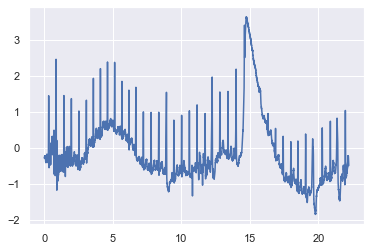

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.misc import electrocardiogram
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

ecg = electrocardiogram()[10000:18000]
#ecg = electrocardiogram()[17000:18000]

fs = 360
time = np.arange(ecg.size) / fs
plt.plot(time, ecg)


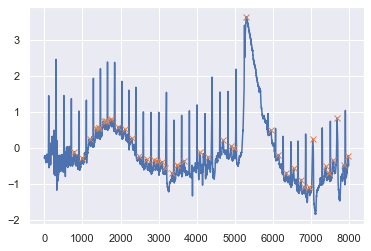

In [ ]:
peaks, properties = find_peaks(ecg, width=20)
peaks
plt.plot(ecg)
plt.plot(peaks, ecg[peaks], "x")

(8000,)
(8000,)


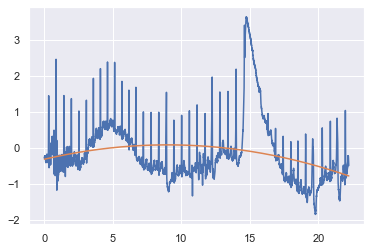

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
print(time.shape)
print(ecg.shape)
X_lr = time.reshape(-1, 1) 
y_lr = ecg.reshape(-1,1)
poly = PolynomialFeatures(2)
X_lr = poly.fit_transform(X_lr)
reg = LinearRegression().fit(X_lr, y_lr)
reg.score(X_lr, y_lr)
y_hat = reg.predict(X_lr)
plt.plot(time,ecg)
plt.plot(time,y_hat)

[3237] []
[3237]


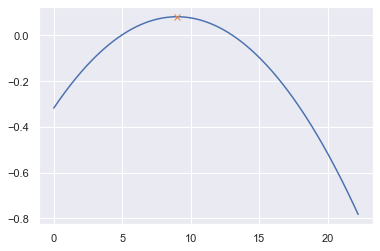

In [ ]:
# find peaks
peaks_p, properties_p = find_peaks(y_hat.reshape(-1))
peaks_n, properties_n = find_peaks(-y_hat.reshape(-1))
print(peaks_p,peaks_n)
peaks = np.array(np.concatenate((peaks_p, peaks_n)))
print(peaks)
plt.plot(time.reshape(-1),y_hat.reshape(-1))
plt.plot(time.reshape(-1)[peaks], y_hat.reshape(-1)[peaks], "x")

[   0 1999 3999 5999 7999]


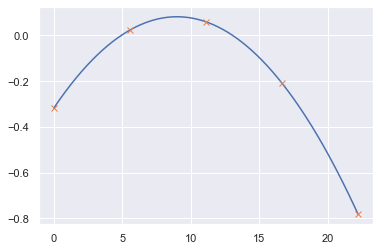

In [ ]:
# split line into n segments
peaks = np.linspace(0,len(y_hat.reshape(-1))-1,5, dtype=int) 
print(peaks)
plt.plot(time.reshape(-1),y_hat.reshape(-1))
plt.plot(time.reshape(-1)[peaks], y_hat.reshape(-1)[peaks], "x")

[   0 1999 3999 5999 7999]
[[ 0.         -0.31766497]
 [ 5.55277778  0.02362275]
 [11.10833333  0.05991783]
 [16.66388889 -0.20902677]
 [22.21944444 -0.78321103]]


/home/manuel/visiont3lab-github/public/tecnologie_data_science/env/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


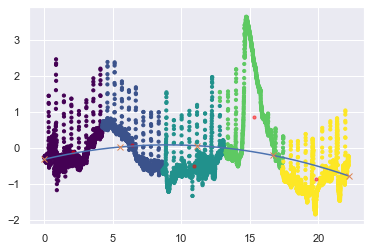

In [ ]:
X = np.array([time,ecg]).T
print(peaks)
xx = time.reshape(-1)[peaks]
yy = y_hat.reshape(-1)[peaks]
c = np.array([xx,yy]).T
print(c)
kmeans = KMeans(n_clusters=len(peaks), init=c)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=10, alpha=0.5);
plt.plot(time.reshape(-1),y_hat.reshape(-1))
plt.plot(time.reshape(-1)[peaks], y_hat.reshape(-1)[peaks], "x")

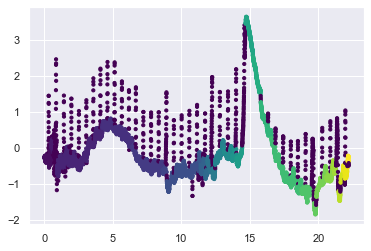

In [ ]:
 from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.1, min_samples=20).fit(X)
labels = clustering.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')

Compute structured hierarchical clustering...


/home/manuel/visiont3lab-github/public/tecnologie_data_science/env/lib/python3.6/site-packages/sklearn/cluster/_agglomerative.py:247: UserWarning: the number of connected components of the connectivity matrix is 631 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


Number of points: 8000


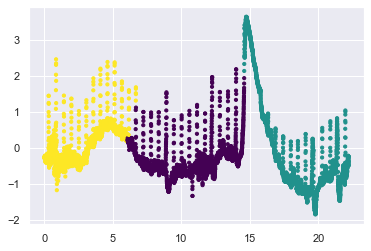

In [ ]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html#sphx-glr-auto-examples-cluster-plot-ward-structured-vs-unstructured-py
# #############################################################################
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering
connectivity = kneighbors_graph(X, n_neighbors=2, include_self=False)

# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
ward = AgglomerativeClustering(n_clusters=3, connectivity=connectivity,
                               linkage='ward').fit(X)
label = ward.labels_
print("Number of points: %i" % label.size)
plt.scatter(X[:, 0], X[:, 1], c=label, s=10, cmap='viridis')

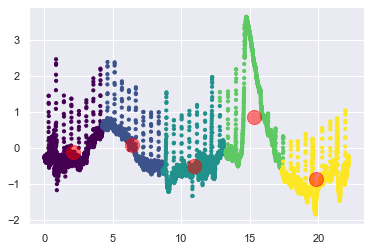

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

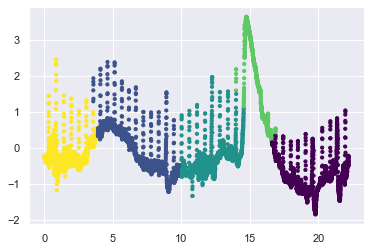

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=len(peaks), affinity='rbf',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')

## Example: k-means on digits 

### Classificazione usando LogisticRegression e RandomForest

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

# Quando usiamo LogisticRegression è importante applicate Standard Scaling come preprocessing
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test =train_test_split(X_digits, y_digits)
scaler = preprocessing.StandardScaler().fit(X_train) # mean 0 , std=1
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

#clf = LogisticRegression(random_state=42)
clf = RandomForestClassifier() #max_depth=10, random_state=0)
clf.fit(X_train_sc, y_train)
clf.score(X_test_sc, y_test)    

0.9733333333333334

In [ ]:
# Logistic Regression
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
pipeline = Pipeline([
  ("standard_scaling", preprocessing.StandardScaler()),
  ("log_reg", LogisticRegression()),
  ])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9733333333333334

### Classificazione usando Kmeans

Qui tenteremo di usare KMeans per  identificare cifre simili.Questo potrebbe essere simile a un primo passo per estrarre significato da un nuovo set di dati per il quale non si dispone di informazoni sul numero associato alle immagini. Ricordiamoci che il dataset digits è costituito da 1.797 immagini di dimensione  8 × 8=64

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The clustering can be performed as we did before:

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

The result is 10 clusters in 64 dimensions.
Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster.
Let's see what these cluster centers look like:

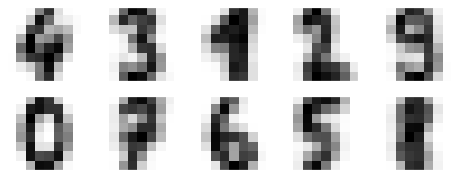

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that *even without the labels*, ``KMeans`` is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

Because *k*-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted.
We can fix this by matching each learned cluster label with the true labels found in them:

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

With just a simple *k*-means algorithm, we discovered the correct grouping for 80% of the input digits!
Let's check the confusion matrix for this:

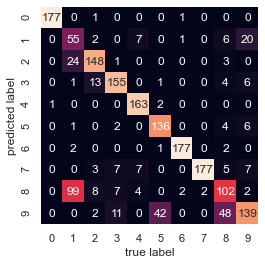

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

As we might expect from the cluster centers we visualized before, the main point of confusion is between the eights and ones.
But this still shows that using *k*-means, we can essentially build a digit classifier *without reference to any known labels*!

### Classificazione usando TSNE

Just for fun, let's try to push this even farther.
We can use the t-distributed stochastic neighbor embedding (t-SNE) algorithm (mentioned in [In-Depth: Manifold Learning](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.10-Manifold-Learning.ipynb) to pre-process the data before performing *k*-means.
t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.
Let's see how it does:

In [ ]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9371174179187535

That's nearly 92% classification accuracy *without using the labels*.
This is the power of unsupervised learning when used carefully: it can extract information from the dataset that it might be difficult to do by hand or by eye.